### Introduction to colour

To this point, we've been working with greyscale images. Each pixel had a single value specifying its brightness: 0 for black, 255 for white, and shades of grey between.

<figure class="figure" style="float:right; margin-left:2em;">
<table class="table table-striped table-hover" style="width:400px;">
<tr><td></td><th>red component</th><th>green component</th><th>blue component</th></tr>
<tr><th style="color:#000000;">black</th><td>0</td><td>0</td><td>0</td>
<tr><th style="color:#ff0000;">red</th><td>255</td><td>0</td><td>0</td>
<tr><th style="color:#00ff00;">green</th><td>0</td><td>255</td><td>0</td>
<tr><th style="color:#0000ff;">blue</th><td>0</td><td>0</td><td>255</td>
<tr><th style="color:#ffff00;">yellow</th><td>255</td><td>255</td><td>0</td>
<tr><th style="color:#ff00ff;">magenta</th><td>255</td><td>0</td><td>255</td>
<tr><th style="color:#00ffff;">cyan</th><td>0</td><td>255</td><td>255</td>
<tr><th style="color:#ffffff;">white</th><td>255</td><td>255</td><td>255</td>
</table>
</figure>

One common way to represent colour is as a mixture of three component primary colours: **red**, **green**, and **blue**. Each of these three components can take any value from 0 (i.e., none) to 255 (i.e. as bright as possible). 

For example:

<span style="font-size:100%; padding-left:1em; background:#ff0000;">&nbsp;</span> To make **red**, we want as much red as possible (255) and none (0) of green or blue. Thus, when we're using <code>getpixel()</code> or <code>putpixel()</code> we should expect/assign the triplet of values <code>(255, 0, 0)</code> as a tuple, where before we would just have had a single integer.

<span style="font-size:100%; padding-left:1em; background:#00ff00;">&nbsp;</span> To make **green**, we do something similar, but in this case it's the middle value that we set to the maximum: <code>(0, 0, 0)</code>.

<span style="font-size:100%; padding-left:1em; background:#ffff00;">&nbsp;</span> What about mixing colours? In <a href="https://en.wikipedia.org/wiki/RGB_color_model">additive colour mixing</a>, **yellow** is created by mixing **red** and **green**. Let's assume we want our yellow to be as bright as possible. So we dial both the first two components up to the max, and leave blue at zero: <code>(255, 255, 0)</code>.

<div class="alert alert-success">
<h3>Try it out</h3>
<p>
Practice creating new <strong>Image</strong> objects in colour (<code>'RGB'</code> mode) instead of greyscale (<code>'L'</code>).</p>
<p>🤔 Specify different background colours as <code>(r, g, b)</code> triples and see what happens.
</p></div>

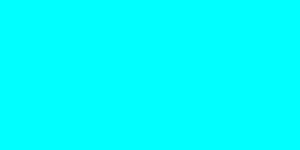

In [3]:
from PIL import Image

# cyan rectangle
foo = Image.new('RGB', (300, 150), (0, 255, 255))
foo

## “Garnet and gold” checkerboard

As in the previous classes, but now in the glorious <del>Gryffindor</del> Mount Allison colours...

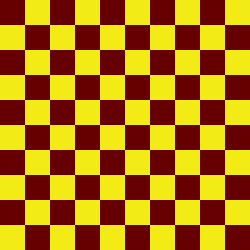

In [8]:
#HIDE
# start with a fresh image
foo = Image.new('RGB', (250, 250))

# set the step parameters
step_x = 25
step_y = 25

# set colours
col1 = (102, 0, 0) # garnet
col2 = (242, 235, 22) # gold

# iterate over all pixels
for x in range(foo.width):
    for y in range(foo.height):
        if (x // step_x) % 2 == (y // step_y) % 2:
            foo.putpixel((x,y), col1)
        else:
            foo.putpixel((x,y), col2)
foo

# Mixing primary colours

Let's blend primary colours one at a time to see the various combinations at work.

### Step 1: a black canvas with a single red rectangle

<ul>
<li>Create a new image, dimensions <code>(300, 200)</code>, background black.</li>
<li>Add a red rectangle, from upper-left <code>(80, 20)</code> to lower-right <code>(180, 110)</code>.</li>
</ul>

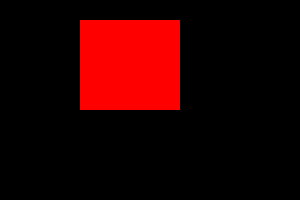

In [9]:
#HIDE
foo = Image.new('RGB', (300, 200))

for x in range(80, 180):
    for y in range(20, 110):
        foo.putpixel((x,y), (255, 0, 0))

foo

### Step 2: an overlapping green rectangle

Continuing to work with the same image:
<ul><li>Add a green rectangle from <code>(15, 60)</code> to <code>(130, 175)</code>.</li>
</ul>
<div class="alert alert-warning">
<h5>⚠️ Careful</h5>
<ul><li>you can't just set each pixel to <code>(0, 255, 0)</code> in this case</li>
<li>to blend the colors, you have to <strong>preserve the existing red and blue values</strong>, but add your green</li>
</ul>

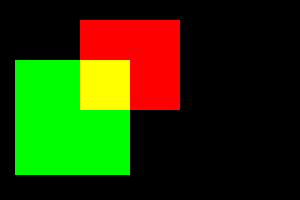

In [10]:
#HIDE
for x in range(15, 130):
    for y in range(60, 175):
        r, g, b = foo.getpixel((x,y))
        g = 255
        foo.putpixel((x,y), (r,g,b))        
foo

Where the green and red are added together, you should get yellow.

### Step 3: add a blue rectangle

For the final piece, add a blue rectangle from <code>(100, 40)</code> to <code>(270, 160)</code>

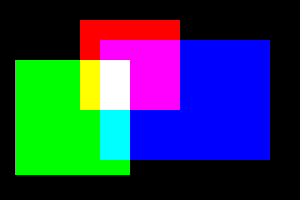

In [11]:
#HIDE
for x in range(100, 270):
    for y in range(40, 160):
        r, g, b = foo.getpixel((x,y))
        b = 255
        foo.putpixel((x,y), (r,g,b))        
foo

You should see all combinations of the three primary colours where the squares overlap.
<ul>
<li><strong>Magenta</strong> at the intersection of <strong>red</strong> and <strong>blue</strong></li>
<li><strong>Cyan</strong> at the intersection of <strong>blue</strong> and <strong>green</strong></li>
<li><strong>Yellow</strong> at the intersection of <strong>green</strong> and <strong>red</strong></li>
<li><strong>White</strong> where all three overlap</li>
</ul>

### Challenge option

If you want to be really elegant, try using overlapping circles instead of squares. Go back to the “Worst class ever known” peep-hole exercise (<a href="https://moodle.mta.ca/mod/page/view.php?id=211033" target="_blank">Images II</a>) for the basic template. If you want to try to match the image below, here are the parameters:

<ul>
<li>image dimensions: <code>(300, 300)</code></li>
<li>radius (all circles are the same size): <code>80</code></li>
<li>centres:</li>
<ul style="margin-top:0px;">
<li>red: <code>(150, 100)</code></li>
<li>green: <code>(100, 200)</code></li>
<li>blue: <code>(200, 200)</code></li>
</ul>
</ul>

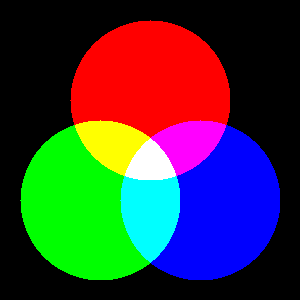

In [12]:
#HIDE
# need math for distance calculations
import math

# define a circle-drawing function
def draw_circle(img, cent, rad, col):
    '''overlay a coloured circle (additive)'''
    
    cent_x, cent_y = cent
    add_r, add_g, add_b = col
    
    for x in range(max(cent_x - rad, 0), min(cent_x + r, img.width)):
        for y in range(max(cent_y - rad, 0), min(cent_y + r, img.height)):
            dist = math.sqrt((x - cent_x)**2 + (y - cent_y)**2)
            if dist <= rad:
                old_r, old_g, old_b = img.getpixel((x, y))
                img.putpixel((x, y), (old_r + add_r, old_g + add_g, old_b + add_b))


# start with a blank (black) image
foo = Image.new('RGB', (300, 300), (0, 0, 0))

# three centre-points
p1 = (150, 100) # upper middle
p2 = (100, 200) # lower right
p3 = (200, 200) # lower right

# radius
r = 80

# three primary colours
c1 = (255, 0, 0) # red
c2 = (0, 255, 0) # green
c3 = (0, 0, 255) # blue

# draw three overlapping circles
draw_circle(foo, p1, r, c1)
draw_circle(foo, p2, r, c2)
draw_circle(foo, p3, r, c3)

# display the image
foo

### Manipulating colour images

Let's overlay two different colour images. First, we'll download two "cat of the day" pics from the internet: